<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Assignment_3_nearly_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [126]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [127]:
# load dataset
df = pd.read_csv('loan_prediction.csv')
# shape and type of df
print(df.shape)
print(type(df))

(614, 13)
<class 'pandas.core.frame.DataFrame'>


In [128]:
assert df.shape == (614, 13)

In [129]:
# head of df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [130]:
# dropping loan column
df.drop('Loan_ID',axis = 1, inplace=True)
# check Loan_status feature dtype and transform it into numerical values.
print(type(df['Loan_Status']))
#cast Loan_status
df['Loan_Status'] = pd.Categorical(df['Loan_Status']).codes

<class 'pandas.core.series.Series'>


In [131]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [132]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [133]:
# building stats
col = ['type','# null','# unique','unique values']
stats = pd.DataFrame(columns= col, index = df.columns)
for i in df.columns:
  stats[col[0]].loc[i] = df[i].dtype
  stats[col[1]].loc[i] = df[i].isna().sum()
  stats[col[2]].loc[i] = df[i].nunique()
  stats[col[3]].loc[i] = '-'.join(map(str, df[i].unique()))


#regarder display width          
pd.set_option("display.max_seq_items",20)
pd.set_option("max_colwidth", 20)
#df['Gender'].dtype
#df['Gender'].nunique()
#df['Gender'].isna().sum()
#df['Gender'].unique()
#df.info()
#print(df['LoanAmount'].nunique)
#print(df.dtypes)
#print(df.nunique)

stats.head(10)

,type,# null,# unique,unique values
Gender,object,13,2,Male-Female-nan
Married,object,3,2,No-Yes-nan
Dependents,object,15,4,0-1-2-3+-nan
Education,object,0,2,Graduate-Not Gra...
Self_Employed,object,32,2,No-Yes-nan
ApplicantIncome,int64,0,505,5849-4583-3000-2...
CoapplicantIncome,float64,0,287,0.0-1508.0-2358....
LoanAmount,float64,22,203,nan-128.0-66.0-1...
Loan_Amount_Term,float64,14,10,360.0-120.0-240....
Credit_History,float64,50,2,1.0-0.0-nan


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [134]:
# filling Married nan value with Yes
print(df['Married'].isnull().sum())
df['Married'] = df['Married'].fillna("Yes")
print(df['Married'].isnull().sum())

3
0


In [135]:
#dropping missing value row 
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(614, 12)
(480, 12)


In [136]:
#homemade verification:
for i in df.columns:
  print(df[i].isnull().sum())


0
0
0
0
0
0
0
0
0
0
0
0


In [137]:
#better verification:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

Loan_Status = 0.6916666666666667


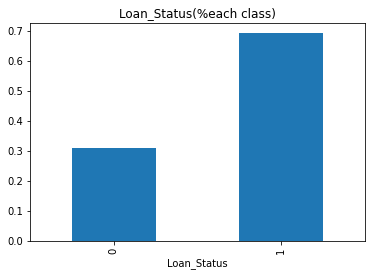

In [138]:
# your code here
df.head()
#based on the titanic example
%matplotlib inline
import matplotlib.pyplot as plt
print ('Loan_Status =', df['Loan_Status'].mean())
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Loan_Status(%each class)")



5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [139]:
# your code here
print("there is ", df.groupby('Loan_Status').size()[1], " approved loan")
print("there is ", df.groupby('Loan_Status').size()[0], " non approved loan")
#
print("we should get a 100% accuracy if we had only '"'1'"', i think i am not really understanding the question ")

there is  332  approved loan
there is  148  non approved loan
we should get a 100% accuracy if we had only '1', i think i am not really understanding the question 


In [140]:
# your answer here
print(df['Property_Area'].nunique())

3


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [141]:
def make_bar_plot(df, column):
  plotframe = pd.DataFrame()
  plotframe['total']=df.groupby(column).size()
  plotframe['Loan_Status'] = df.groupby(column).sum()['Loan_Status']
  plotframe['percentage'] = round(plotframe['Loan_Status']/plotframe['total'],2)
  print(plotframe)
# make a function to plot approval rate against attribute
  #plotframe['Loan_Status'].plot(kind="barh")
  #plotframe['percentage'].plot(kind="barh",alpha=1,title="approval rate per "+str(column))
  plotframe['percentage'].plot.barh(title="approval rate per "+str(column), color=['green','purple','pink'])
  plt.show()




               total  Loan_Status  percentage
Property_Area                                
Rural            139         85.0        0.61
Semiurban        191        149.0        0.78
Urban            150         98.0        0.65


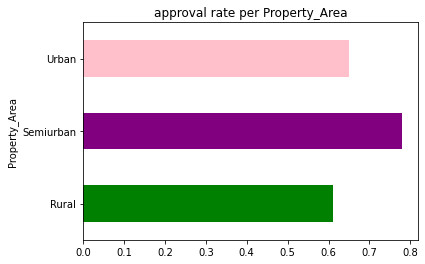

In [142]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [143]:
def make_box_plot(df, column):  
  # your code here
  df.boxplot(column= [column], by=['Loan_Status'])
  plt.show()
  

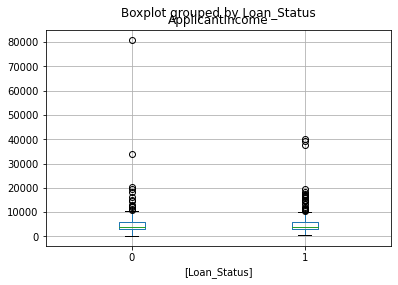

In [144]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

In [145]:
print(df.columns)
print(df.dtypes)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status             int8
dtype: object


        total  Loan_Status  percentage
Gender                                
Female     86         54.0        0.63
Male      394        278.0        0.71


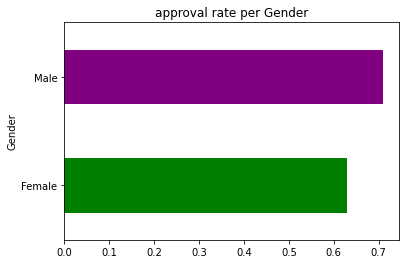

         total  Loan_Status  percentage
Married                                
No         169        105.0        0.62
Yes        311        227.0        0.73


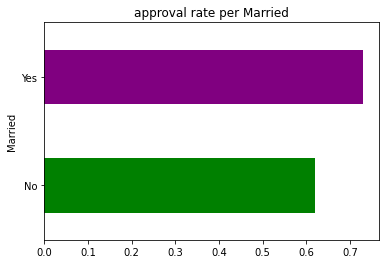

            total  Loan_Status  percentage
Dependents                                
0             274        187.0        0.68
1              80         52.0        0.65
2              85         65.0        0.76
3+             41         28.0        0.68


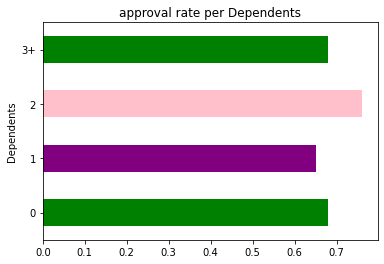

              total  Loan_Status  percentage
Education                                   
Graduate        383        271.0        0.71
Not Graduate     97         61.0        0.63


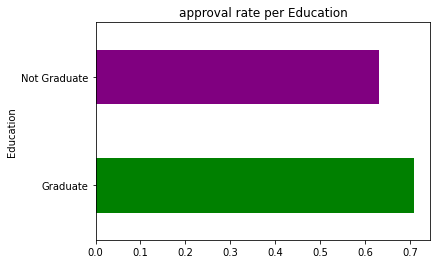

               total  Loan_Status  percentage
Self_Employed                                
No               414        289.0        0.70
Yes               66         43.0        0.65


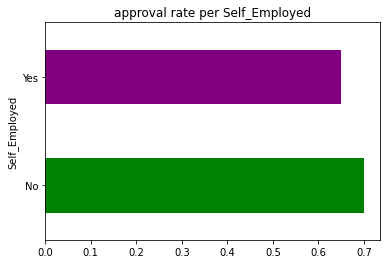

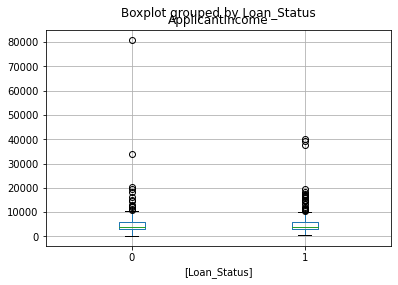

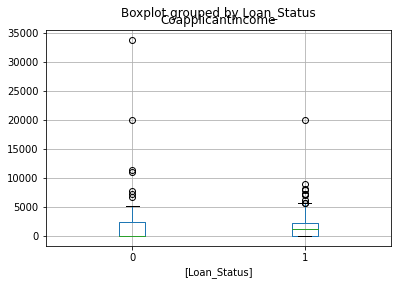

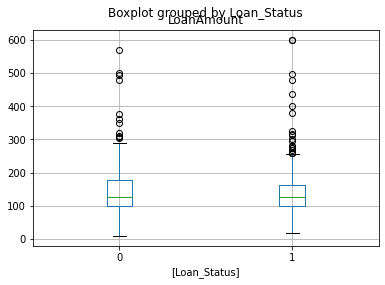

                  total  Loan_Status  percentage
Loan_Amount_Term                                
36.0                  2          0.0        0.00
60.0                  2          2.0        1.00
84.0                  3          2.0        0.67
120.0                 3          3.0        1.00
180.0                36         24.0        0.67
240.0                 2          1.0        0.50
300.0                 9          4.0        0.44
360.0               411        292.0        0.71
480.0                12          4.0        0.33


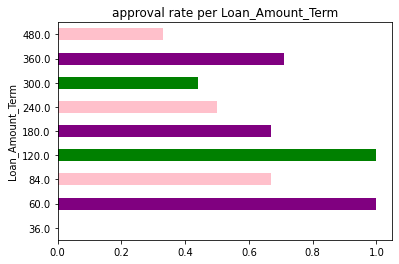

                total  Loan_Status  percentage
Credit_History                                
0.0                70          7.0        0.10
1.0               410        325.0        0.79


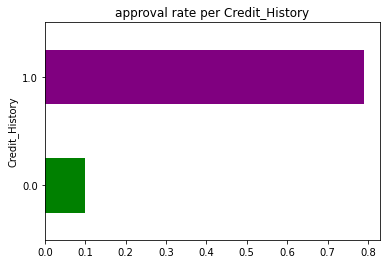

               total  Loan_Status  percentage
Property_Area                                
Rural            139         85.0        0.61
Semiurban        191        149.0        0.78
Urban            150         98.0        0.65


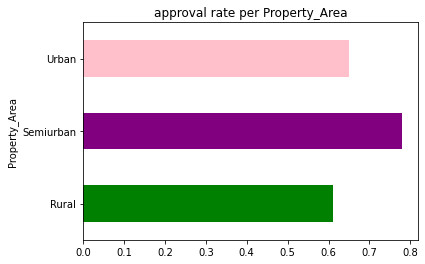

In [146]:
#mycodehere:
# On a remarqué qu'il semblait plus logique de faire des barplot avec Credit_History et Loan_Amount_term,
# du moins les graphs etaient plus lisible ainsi alors
# on a pris la liberté de les afficher sous forme de bar plutot que de box

for col in df.columns[:-1]: 
    if df[col].dtype == 'object':
      make_bar_plot(df,col)
    elif col == 'Credit_History':
      make_bar_plot(df,col)
    elif col == 'Loan_Amount_Term':
      make_bar_plot(df,col)
    else:
      make_box_plot(df,col)  


    # your code here


        total  Loan_Status  percentage
Gender                                
Female     86         54.0        0.63
Male      394        278.0        0.71


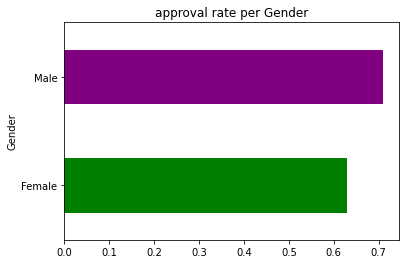

                total  Loan_Status  percentage
Credit_History                                
0.0                70          7.0        0.10
1.0               410        325.0        0.79


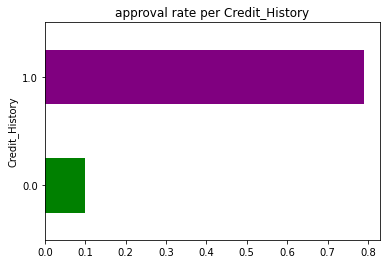

In [147]:
make_bar_plot(df,'Gender')
make_bar_plot(df,'Credit_History')

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [148]:
# your code here
df = pd.get_dummies(df, columns=['Property_Area','Dependents'])

print the head of df

In [151]:
# your code here
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [150]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [152]:
# freshly imported from titanic notebook:
for col in df.columns: # Loop through all columns in predictors
    if df[col].dtype == 'object':  # check if column's type is object (text)
        df[col] = pd.Categorical(df[col]).codes  # convert text to numerical

Print the head of df

In [153]:
# your code here
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [154]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [158]:
y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1,inplace=False)
print (df.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [164]:
# freshly imported from the titanic notebook
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 11)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336,)
test shape (144, 16) (144,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [167]:
# same as before 
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=11)
# your code here
clf.fit(X_train,y_train) #Fit the model according to the given training data. (doc )
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8154761904761905
test accuracy = 0.7916666666666666




9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [171]:
# After looking again at the course we need to establish a y_pred to create our confusion matrix
#until now we just fitted our model with the logistic regression, now is time to predict the future
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

absolute_confusion = confusion_matrix(y_test, y_pred)

print(absolute_confusion)
#we can see we have around 23 true negative, 91 true positive which are good prediction and
#we have 26 false positive and only 4 false negative so our model is biased toward not giving loan which is okay for a bank
#because the bank wont lose money by not giving the loan anyway, so that's our interpretation of the confusion matrix.

[[23 26]
 [ 4 91]]


In [177]:
#give name to the variable to understand the coming formula
True_Negative = absolute_confusion[0][0]
False_Positive = absolute_confusion[0][1]
False_Negative = absolute_confusion[1][0]
True_Positive = absolute_confusion[1][1]

91


In [ ]:
#now let's look at the precison and recall
# Precision = (𝑇𝑟𝑢𝑒 𝑝𝑜𝑠𝑖𝑡𝑖𝑣𝑒)/(𝑇𝑟𝑢𝑒 𝑝𝑜𝑠𝑖𝑡𝑖𝑣𝑒 + 𝐹𝑎𝑙𝑠𝑒 𝑝𝑜𝑠𝑖𝑡𝑖𝑣𝑒) according to the course
precision_0 = 
recall_1 = # your code here
print ('precision_0 =', # your code here)
print ('recall_1 =',# your code here)

10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
# evaluate the model using 5-fold cross-validation
# your code here
scores = # your code here
print (scores)
print ('scores mean =', '# your code here', 'scores std =', '# your code here')

how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.